In [1]:
import pandas as pd
import numpy as np
import hello_japan
import sbi_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ind, tpx = sbi_data.csv_date(folder = 'kabutan-201805', number = 'tpx')

In [3]:
kabutan_db = pd.read_excel('D:/equity-study/analyze-data/kabutan-201805.xlsx', index_col="date")

In [4]:
data_op = {}
data_p = {}
data_oc = {}
data_v = {}
data_oi = {}
data_i = {}
data_chg = {}
data_ioc = {}

for i in range(len(kabutan_db)):
    df = sbi_data.csv_date(folder = 'kabutan-201805', number = kabutan_db.iloc[i, 0])[0]
    df = df.loc[kabutan_db.index[i]:, :].copy()
    
    df1 = sbi_data.csv_date(folder = 'kabutan-201805', number = 'tpx')[1]
    df1 = df1.loc[kabutan_db.index[i]:, :].copy()
    
    oc = []
    o_p = []
    price = []
    volume = []
    op_ind = []
    ind = []
    ioc = []
    
    for i2 in range(15):
        o_p.append(df.iloc[i2, 0])
        price.append(df.iloc[i2, 3])
        volume.append(df.iloc[i2, 8])
        op_ind.append(df1.iloc[i2, 0])
        ind.append(df1.iloc[i2, 3])
        
        oc.append(df.iloc[i2, 0])
        oc.append(df.iloc[i2, 3])
        ioc.append(df1.iloc[i2, 0])
        ioc.append(df1.iloc[i2, 3])
        
        
    data_op['{}'.format(kabutan_db.iloc[i, 0])] = o_p
    data_p['{}'.format(kabutan_db.iloc[i, 0])] = price
    data_v['{}'.format(kabutan_db.iloc[i, 0])] = volume
    data_oi['{}'.format(kabutan_db.iloc[i, 0])] = op_ind
    data_i['{}'.format(kabutan_db.iloc[i, 0])] = ind
    data_oc['{}'.format(kabutan_db.iloc[i, 0])] = oc
    data_ioc['{}'.format(kabutan_db.iloc[i, 0])] = ioc

###  決算発表の当日からの価格を取っている　＝＝＞　０の引けから1の寄りが決算発表に対するアクション
* data_opが始値のデータ
* data_pが引値のデータ
* ふたつを混ぜたデータを作る data_oc

In [5]:
data_oc = pd.DataFrame(data_oc)  # 始値と終値のデータ
data_op = pd.DataFrame(data_op)  # 始値のデータ
data_p = pd.DataFrame(data_p)    # 終値のデータ
data_v = pd.DataFrame(data_v)    # 出来高
data_oi = pd.DataFrame(data_oi)  # インデックスの始値のデータ
data_i = pd.DataFrame(data_i)
data_ioc = pd.DataFrame(data_ioc)

In [6]:
data_oc

,3825,2158,3291,4783,6240,6409,7747,9450,6677,1716,...,4217,4557,6653,8036,4320,3423,3741,8897,9729,9739
0,4500,900,2126,1609,1250,2131,4005,2390,2274,2445,...,2555,2067,998,4640,829,642,2667,436,2260.0,2855
1,4435,905,2091,1373,1200,2108,3950,2448,2341,2325,...,2556,2060,996,4730,814,640,2604,438,2241.0,2850
2,4440,950,2041,1403,1240,2308,4010,2890,2541,2600,...,2506,2560,1120,5040,930,664,2864,470,2341.0,2750
3,4390,962,2114,1320,1275,2237,3800,2749,2367,2540,...,2610,2280,1146,4960,963,694,2876,476,2293.0,2556
4,4445,994,2141,1366,1290,2291,3790,2710,2342,2560,...,2621,2206,1199,5060,948,683,2875,473,2291.0,2545
5,4430,1067,2224,1436,1293,2396,3855,2835,2139,2490,...,2543,2132,1132,5170,920,682,2843,475,2357.0,2502
6,4450,1070,2224,1456,1300,2412,3815,2785,2150,2520,...,2505,2130,1113,5170,1000,682,2843,475,2390.0,2504
7,4495,1060,2236,1431,1330,2432,3795,2698,2246,2496,...,2406,2076,1071,5110,949,671,2777,467,2412.0,2474
8,4500,1056,2260,1431,1320,2414,3800,2750,2261,2502,...,2390,2080,1060,5110,979,671,2779,467,2417.0,2500
9,4645,1152,2222,1490,1355,2552,3835,3090,2415,2477,...,2371,2093,1119,4960,930,660,2744,465,2466.0,2453


### 95銘柄全てのオープンとクローズのデータを見る

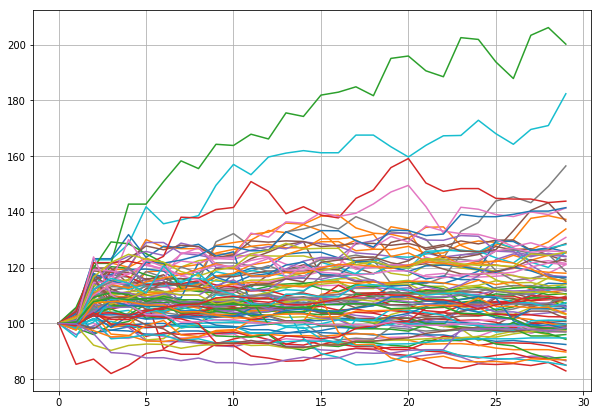

In [45]:
data_oc1 = data_oc / data_oc.iloc[0, :] * 100
data_oc1.plot(figsize=(10,7), legend=None, grid = True)

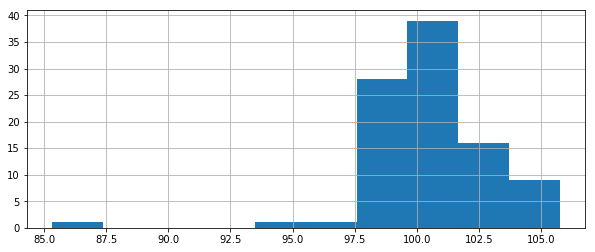

In [8]:
data_oc1.iloc[1, :].hist(figsize=(10, 4)) # 1のデータ（発表日の終値）

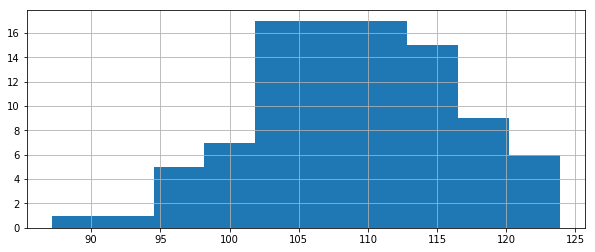

In [9]:
data_oc1.iloc[2, :].hist(figsize=(10,4)) # 2のデータ（発表翌日の寄付）

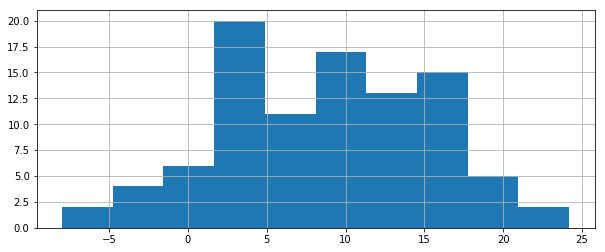

In [47]:
(data_oc1.iloc[2, :] - data_oc1.iloc[1, :]).hist(figsize=(10,4)) # 決算発表後のアクション　決算発表日引け　＝＞　決算発表日翌日寄り付き
# 決算発表後の寄付の反応はやはりプラスが多い

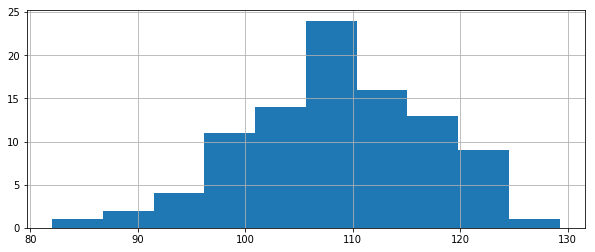

In [48]:
data_oc1.iloc[3, :].hist(figsize=(10, 4)) # 3のデータ（発表翌日の終値）
# しかし、終値で見ると標準偏差のような形となっている。

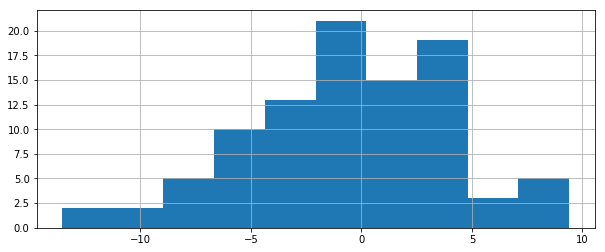

In [49]:
(data_oc1.iloc[3, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4))
# 終値ー寄付きのデータ。ダウンサイドのテイルが長い

In [50]:
cnt = data_oc1.iloc[3, :] - data_oc1.iloc[2, :] > 0
cnt.value_counts()
# 終値ー寄付きのデータ。ゼロ以上が44銘柄と少なく、ダウンサイドのテールが伸びている。

False    51
True     44
dtype: int64

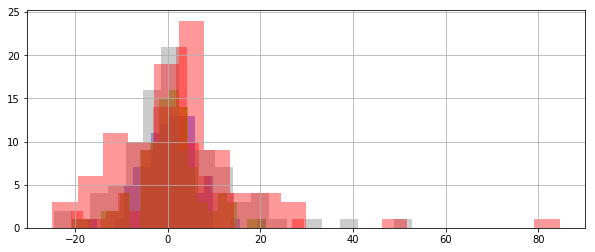

In [52]:
# 各期間の対決算発表後の寄付き
(data_oc1.iloc[4, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='blue', bins = 20)
(data_oc1.iloc[5, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='orange', bins = 20)
(data_oc1.iloc[5, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='lime', bins=20)
(data_oc1.iloc[6, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='red', bins = 20)
(data_oc1.iloc[14, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='gray', bins = 20)
(data_oc1.iloc[28, :] - data_oc1.iloc[2, :]).hist(figsize=(10, 4), alpha=0.4, color='red', bins = 20)

In [53]:
#　決算発表後2週間のパフォーマンスの偏り
cnt1 = data_oc1.iloc[28, :] - data_oc1.iloc[2, :] > 10
cnt2 =  data_oc1.iloc[28, :] - data_oc1.iloc[2, :] > 5
cnt3 =  data_oc1.iloc[28, :] - data_oc1.iloc[2, :] > 0

print(cnt1.value_counts())
print(cnt2.value_counts())
print(cnt3.value_counts())

False    76
True     19
dtype: int64
False    60
True     35
dtype: int64
True     57
False    38
dtype: int64


In [16]:
cnt1 = data_oc1.T.iloc[28, :] - data_oc1.T.iloc[1, :] > 10
cnt2 =  data_oc1.T.iloc[28, :] - data_oc1.T.iloc[1, :] > 5
cnt3 =  data_oc1.T.iloc[28, :] - data_oc1.T.iloc[1, :] > 0

print(cnt1.value_counts())
print(cnt2.value_counts())
print(cnt3.value_counts())

False    29
True      1
dtype: int64
False    29
True      1
dtype: int64
False    27
True      3
dtype: int64


In [17]:
data_oc2 = data_oc1.T.copy()

### 決算への反応により分類する
* pos_first : 決算発表の翌日の寄付きの反応がプラスに出た銘柄
* neg_first : 決算発表の翌日の寄付きの反応がマイナスに出た銘柄
* pos_second : 決算発表の翌日の引値が寄付きよりも高かった銘柄
* neg_second : 決算発表の翌日の引値が寄付きよりも安かった銘柄
* eq_second : 決算発表の翌日の引値が寄付きと同じやった銘柄

In [18]:
pos_first = data_oc2[data_oc2.iloc[:, 2] - data_oc2.iloc[:,1] > 0] # 決算発表後ー翌日寄付き
pos_first = pos_first.T.copy()
pos_second = data_oc2[data_oc2.iloc[:, 3] - data_oc2.iloc[:,2] > 0] # 翌日引けー翌日寄付
pos_second = pos_second.T.copy()
neg_first = data_oc2[data_oc2.iloc[:, 2] - data_oc2.iloc[:,1] < 0] # 決算発表後ー翌日寄付き
neg_first = neg_first.T.copy()
neg_second = data_oc2[data_oc2.iloc[:, 3] - data_oc2.iloc[:,2] < 0] # 翌日引けー翌日寄付
neg_second = neg_second.T.copy()
eq_second = data_oc2[data_oc2.iloc[:, 3] - data_oc2.iloc[:,2] == 0] # 翌日引けー翌日寄付
eq_second = eq_second.T.copy()

print('first合計: {}、Second合計: {}'.format(len(pos_first.T)+ len(neg_first.T), len(pos_second.T) + len(neg_second.T) + len(eq_second.T)))

first合計: 95、Second合計: 95


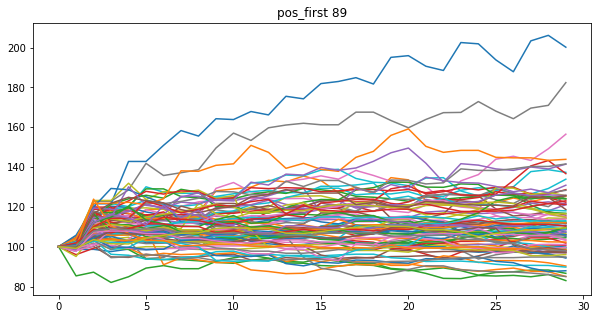

In [19]:
pos_first_num = len(pos_first.T)
pos_first.plot(figsize=(10,5), legend=None, title='pos_first {}'.format(pos_first_num))

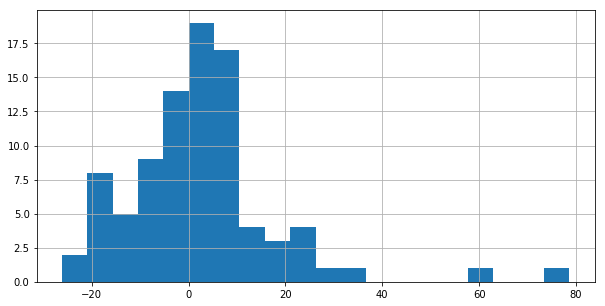

In [20]:
pos_first_result = (pos_first.iloc[29, :] - pos_first.iloc[2, :])
pos_first_result.hist(figsize=(10, 5), bins = 20)

In [21]:
print(pos_first_result.describe())
print((pos_first_result > 0).value_counts())
print((pos_first_result > 10).value_counts())
print((pos_first_result < -10).value_counts())

count    89.000000
mean      2.568532
std      15.725842
min     -26.182761
25%      -5.930233
50%       1.814059
75%       9.062500
max      78.623034
dtype: float64
True     51
False    38
dtype: int64
False    73
True     16
dtype: int64
False    74
True     15
dtype: int64


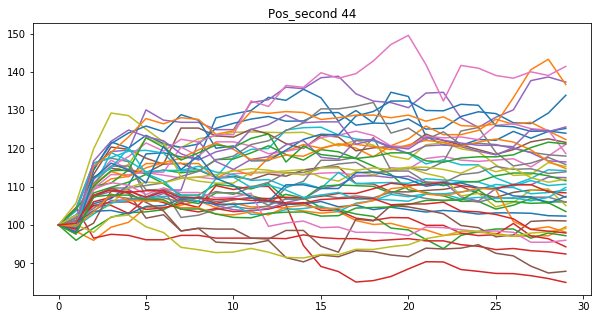

In [22]:
pos_second_num = len(pos_second.T)
pos_second.plot(figsize=(10, 5), legend=None, title='Pos_second {}'.format(pos_second_num))

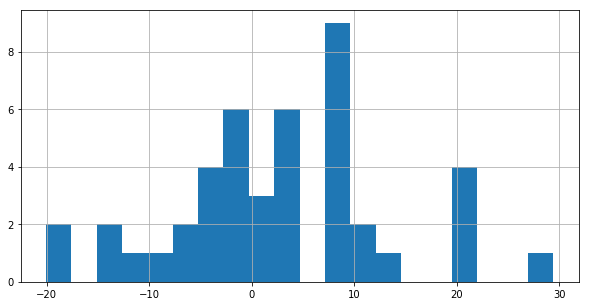

In [23]:
pos_second_result = (pos_second.iloc[29, :] - pos_second.iloc[2, :])
pos_second_result.hist(figsize=(10, 5), bins = 20)

In [24]:
print(pos_second_result.describe())
print((pos_second_result > 0).value_counts())
print((pos_second_result > 10).value_counts())
print((pos_second_result < -10).value_counts())

count    44.000000
mean      2.871615
std      10.727944
min     -20.085699
25%      -3.930750
50%       2.684372
75%       9.074968
max      29.404762
dtype: float64
True     26
False    18
dtype: int64
False    36
True      8
dtype: int64
False    39
True      5
dtype: int64


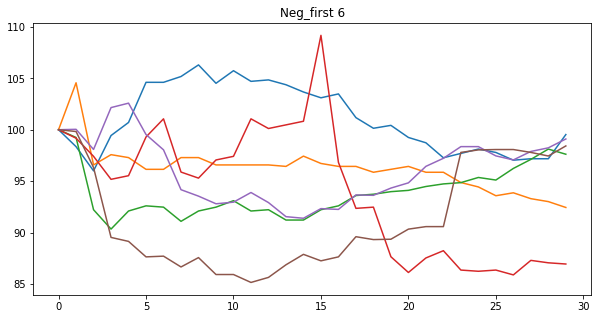

In [25]:
neg_first_num = len(neg_first.T)
neg_first.plot(figsize=(10, 5), legend=None, title='Neg_first {}'.format(neg_first_num))

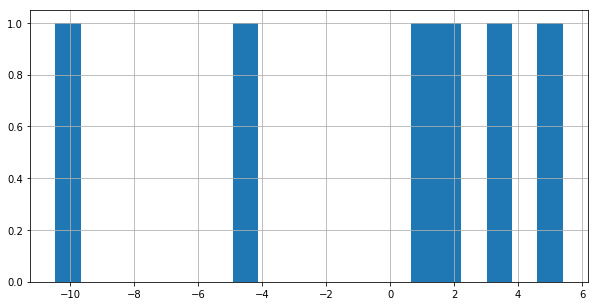

In [26]:
neg_first_result = (neg_first.iloc[29, :] - neg_first.iloc[2, :])
neg_first_result.hist(figsize=(10, 5), bins=20)

In [27]:
print(neg_first_result.describe())
print((neg_first_result > 0).value_counts())
print((neg_first_result > 10).value_counts())
print((neg_first_result < -10).value_counts())

count     6.000000
mean     -0.427560
std       5.876333
min     -10.470588
25%      -2.848307
50%       1.559594
75%       3.171208
max       5.395232
dtype: float64
True     4
False    2
dtype: int64
False    6
dtype: int64
False    5
True     1
dtype: int64


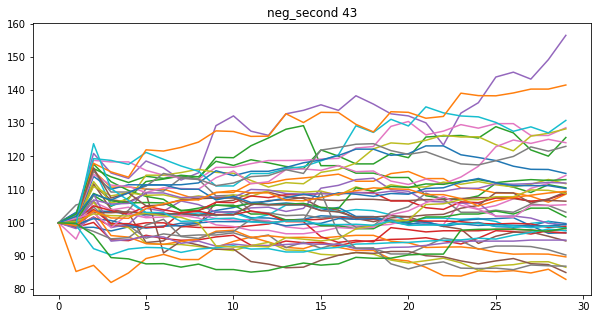

In [28]:
neg_second_num = len(neg_second.T)
neg_second.plot(figsize=(10, 5), legend=None, title='neg_second {}'.format(neg_second_num))

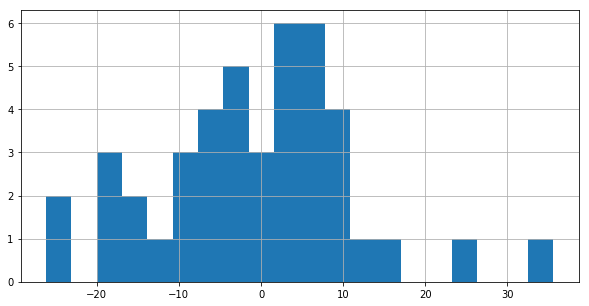

In [29]:
neg_second_result = (neg_second.iloc[29, :] - neg_second.iloc[2, :])
neg_second_result.hist(figsize=(10, 5), bins= 20)

In [30]:
print(neg_second_result.describe())
print((neg_second_result > 0).value_counts())
print((neg_second_result > 10).value_counts())
print((neg_second_result < -10).value_counts())

count    43.000000
mean     -1.025457
std      12.239081
min     -26.182761
25%      -7.684959
50%       0.874795
75%       5.640094
max      35.564854
dtype: float64
True     23
False    20
dtype: int64
False    39
True      4
dtype: int64
False    34
True      9
dtype: int64


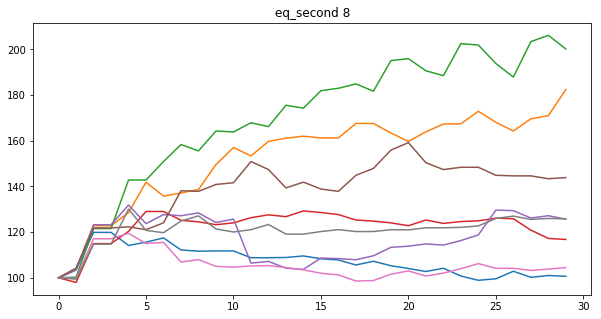

In [31]:
eq_second_num = len(eq_second.T)
eq_second.plot(figsize=(10, 5), legend=None, title='eq_second {}'.format(eq_second_num))

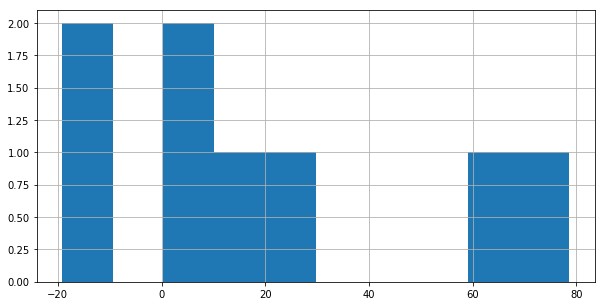

In [32]:
eq_second_result = eq_second.iloc[29, :] - eq_second.iloc[2, :]
eq_second_result.hist(figsize=(10, 5))

In [33]:
eq_second_result.describe()

count     8.000000
mean     17.972190
std      34.416039
min     -19.209660
25%      -1.786008
50%       6.756040
75%      31.433622
max      78.623034
dtype: float64

## オープンの価格とクローズの価格を組み合わせたデータを作り、それで近似データを作る？

In [34]:
data_p1 = data_p / data_p.iloc[0, :] * 100
data_i1 = data_i / data_i.iloc[0, :] * 100

In [35]:
data_n = data_p1 - data_i1

In [36]:
data_n

,3825,2158,3291,4783,6240,6409,7747,9450,6677,1716,...,4217,4557,6653,8036,4320,3423,3741,8897,9729,9739
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.903884,6.409115,1.210725,-3.749388,6.360773,6.230317,-3.686696,12.406524,1.082936,9.219611,...,2.112676,10.679612,15.060241,4.862579,17.334349,7.467180,9.475149,7.705479,1.350073,-11.286109
2,-0.334285,17.679007,6.139048,4.366947,7.528455,13.440694,-2.626609,15.587278,-8.545689,7.179877,...,-0.847782,3.155971,13.315444,8.963151,12.051793,5.592180,8.207868,7.477169,4.205941,-13.180846
3,0.743625,16.517822,6.325232,3.615077,10.224084,14.760769,-4.533300,9.603169,-4.307402,7.105531,...,-6.462100,0.183143,6.936565,7.440271,15.271981,3.530965,5.330840,5.308219,6.317737,-14.505768
4,4.264278,26.822034,5.794161,8.050702,12.445883,20.591835,-3.382176,25.754706,2.523923,5.900515,...,-7.520517,1.319296,12.066752,4.579934,12.680980,1.555365,3.806709,4.594749,8.470526,-15.499459
5,2.739344,28.866646,6.151616,11.858522,11.862042,24.268430,-5.747663,24.286879,5.439019,5.694933,...,-6.170675,0.602803,10.011896,4.094357,7.835201,2.494292,3.083770,4.680365,8.695207,-15.957462
6,2.504030,32.072443,6.370711,8.770724,12.749238,29.850756,-3.927977,29.946951,4.537304,3.538558,...,-8.744209,0.619405,9.082968,5.242448,11.531854,4.001142,4.838315,4.252283,6.676287,-13.981315
7,5.324642,34.203164,6.547201,11.695126,10.633643,20.217925,-2.839986,34.069917,1.759411,4.350639,...,-8.498763,-0.888495,7.240721,4.811129,10.320743,3.460331,3.573138,4.937215,7.251189,-13.823660
8,5.122922,31.137485,4.835655,9.395202,9.132881,18.190123,-2.464165,36.974384,0.109230,5.861794,...,-6.631533,-0.351468,6.673330,6.299530,13.955409,4.011844,5.181438,4.851598,8.850852,-12.015020
9,3.435763,35.667321,3.848925,6.114662,5.078002,16.640305,-1.926217,31.442381,0.529404,6.627230,...,-6.249077,0.385304,6.189881,6.228301,13.760546,8.616581,6.030896,3.567352,9.973188,-11.718397


In [37]:
print(len([i for i in range(len(data_n.columns)) if data_n.iloc[-1, i] > 0]))

71


In [38]:
data_n1 = data_p1 / data_i1

In [39]:
print(len([i for i in range(len(data_n1.columns)) if data_n1.iloc[-1, i] > 1]))

71


In [40]:
data_n.iloc[-1, :].describe()

count     95.000000
mean      11.123263
std       18.409494
min      -15.162650
25%        0.014267
50%        6.920842
75%       21.284398
max      102.362563
Name: 14, dtype: float64

In [41]:
data_n1.iloc[-1, :].describe()

count    95.000000
mean      1.112250
std       0.187265
min       0.848074
25%       1.000127
50%       1.069023
75%       1.214065
max       2.052964
Name: 14, dtype: float64

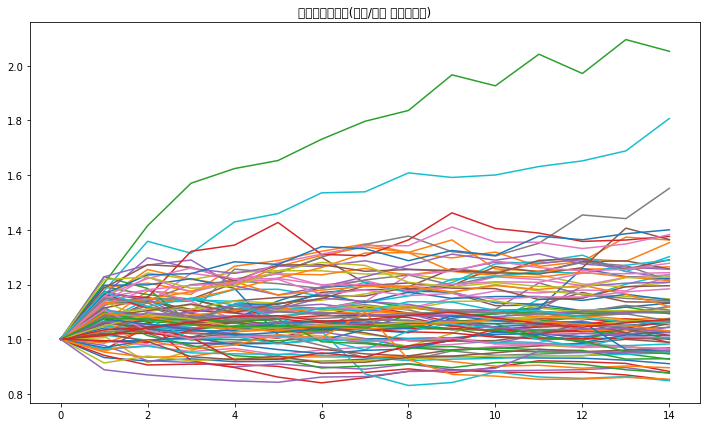

In [42]:
fig = plt.figure(figsize=(12,7))
ax = plt.subplot(1,1,1)
for i in range(len(data_n1.columns)):
    ax.plot(data_n1.index, data_n1.iloc[:, i])
    
plt.title('パフォーマンス(個別/指数 引値ベース)')
plt.show()

(array([ 7., 17., 29., 15., 17.,  6.,  1.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ,
        2.1]),
 <a list of 13 Patch objects>)

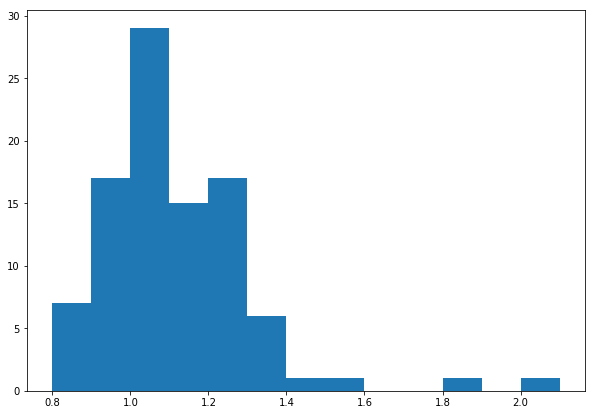

In [43]:
fig = plt.figure(figsize=(10,7))
plt.hist(data_n1.iloc[-1, :], bins = [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])